# Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = (4,3)
plt.style.use("seaborn-whitegrid")

# Importação e visualização dos dados

In [2]:
dataset = pd.read_csv('linear_regression_data.csv',header=None).rename(columns={0:'x',1:'y'})

FileNotFoundError: [Errno 2] File linear_regression_data.csv does not exist: 'linear_regression_data.csv'

In [2]:
sns.scatterplot(dataset['x'],dataset['y'])
plt.show()

NameError: name 'sns' is not defined

# Pré-processamento dos dados

In [4]:
X = np.hstack([np.ones(dataset.shape[0]).reshape(-1,1),dataset['x'].values.reshape(-1,1)])
y = dataset['y'].values.reshape(-1,1)
n_lin,n_col = X.shape
print('X = \n',X)
print('\ny = \n',y)

X = 
 [[ 1.          0.39293837]
 [ 1.         -0.42772133]
 [ 1.         -0.54629709]
 [ 1.          0.10262954]
 [ 1.          0.43893794]
 [ 1.         -0.15378708]
 [ 1.          0.9615284 ]
 [ 1.          0.36965948]
 [ 1.         -0.0381362 ]
 [ 1.         -0.21576496]]

y = 
 [[ 0.08635962]
 [-0.64387173]
 [-0.67498147]
 [-0.26289158]
 [ 0.14317741]
 [-0.47272884]
 [ 0.1141669 ]
 [-0.18032295]
 [ 0.01182141]
 [-0.07986457]]


# Passo de estimação

## Definições a partir de conhecimentos/experimentos anteriores 

Os momentos da priori $p(\mathbf{w}) = \mathcal{N}(\mathbf{w} | \mathbf{m_0},\mathbf{S_0})$. 




$\xrightarrow{}$ Definirei $\mathbf{m_0} = [0 \ 0]$ e $\mathbf{S_0} = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix} $

A variância do ruı́do $ p(\epsilon) = \mathcal{N}(\epsilon | 0,\sigma^2) $

$\xrightarrow{}$ Definirei $\sigma^2 = 1$ 

In [5]:
m0 = np.zeros(n_col).reshape(-1,1)
S0 = np.diag((1,)*n_col)
sigma_ruido = 1

## Cálculo da posteriori de w

$p(\mathbf{w} | \mathcal{D}) = \mathcal{N}(\mathbf{w} | \mathbf{\mu},\mathbf{\Sigma})$

 


$\mathbf{\mu} = \mathbf{m_0} + (\mathbf{S_0}\mathbf{X}^{T}\mathbf{X} + \sigma^2 \mathbf{I})^{-1} \ \mathbf{S_0}\mathbf{X}^{T}(\mathbf{y}-\mathbf{X}\mathbf{m_0})$ ,

In [6]:
u_1 = np.linalg.inv(S0.dot(X.T).dot(X) + np.eye(n_col)*sigma_ruido) 
u_2 = S0.dot(X.T).dot(y - X.dot(m0))
u = m0 + u_1.dot(u_2)
print(u)

[[-0.20591704]
 [ 0.34610423]]


$ \mathbf{\Sigma} = \mathbf{S_0} - (\mathbf{S_0}\mathbf{X}^{T}\mathbf{X} + \sigma^2 \mathbf{I})^{-1} \ \mathbf{S_0}\mathbf{X}^{T}\mathbf{X}\mathbf{S_0} $

In [1]:
sigma_1 = u_1
sigma_2 = S0.dot(X.T).dot(X).dot(S0)
sigma = S0 + sigma_1 * sigma_2
print(sigma)

NameError: name 'u_1' is not defined

# Passo de predição

Distribuição preditiva

$\xrightarrow{} p(\mathbf{y_*} | \mathbf{X_*}) = \mathcal{N}(\mathbf{y_*} | \mathbf{X_*}\mathbf{\mu} \ , \ \mathbf{X_*}\mathbf{\Sigma}\mathbf{X_*}^{T} + \sigma^2\mathbf{I})$

In [8]:
u_final = X.dot(u).flatten()
sigma_final = np.diag(X.dot(sigma).dot(X.T) + sigma_ruido * np.eye(n_lin))
print('u_final = \n',u_final)
print('\nsigma_final = \n',sigma_final)

u_final = 
 [-0.06991941 -0.3539532  -0.39499277 -0.17039652 -0.05399876 -0.2591434
  0.126872   -0.07797633 -0.21911614 -0.28059421]

sigma_final = 
 [3.17146367 3.25960761 3.45941876 2.94402008 3.23348811 2.97861363
 4.43725565 3.14278409 2.9356651  3.02012249]


In [9]:
banda = 2 * np.sqrt(sigma_final).reshape(-1,1).flatten()
banda_mais = u_final + banda
banda_menos = u_final - banda

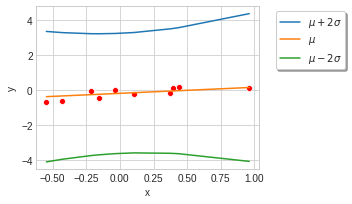

In [10]:
sns.scatterplot(dataset['x'],dataset['y'],color='r')
sns.lineplot(dataset['x'],banda_mais,label='$\mu+2 \sigma$')
sns.lineplot(dataset['x'],u_final,label='$\mu$')
sns.lineplot(dataset['x'],banda_menos,label='$\mu-2 \sigma$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,shadow=True,frameon=True)
plt.show()